In [1]:
import acquire as get
import pandas as pd
import numpy as np
import describe as tatl
from collections import Counter

In [3]:
df = get.acquire_data()

In [4]:
# convert from float to int, consider creating a time series. 
# A random application of timestamps may work in preventing duplicate values
# much like what I implemented on the time-series project. 
df['year'] = df['year'].fillna(0).astype('int')
df = df.rename(columns={'Both sexes': 'both_sexes', 'Female': 'female', 'Male': 'male'})

In [ ]:
df['year2'

In [29]:
df['both_sexes'] = pd.DataFrame(df.both_sexes.str[0:4])

In [30]:
df['female'] = pd.DataFrame(df.female.str[0:4])

In [31]:
df['male'] = pd.DataFrame(df.male.str[0:4])

In [32]:
# Changed both_sexes from object to float
df['both_sexes'] = df['both_sexes'].astype(float)

# Changed female from object to float
df['female'] = df['female'].astype(float)

# Changed male from object to float
df['male'] = df['male'].astype(float)

In [47]:
#tatl.describe_data(df)

In [54]:
def remove_columns(df, cols_to_remove):
    '''
    This function takes in a pandas dataframe and a list of columns to remove. It drops those columns from the original df and returns the df.
    '''
    df = df.drop(columns=cols_to_remove)
    return df
                 
                 
def handle_missing_values(df, prop_required_column=0.5 , prop_required_row=0.5):
    '''
    This function takes in a pandas dataframe, default proportion of required columns (set to 50%) and proprtion of required rows (set to 75%).
    It drops any rows or columns that contain null values more than the threshold specified from the original dataframe and returns that dataframe.
    
    Prior to returning that data, it will print statistics and list counts/names of removed columns/row counts 
    '''
    original_cols = df.columns.to_list()
    original_rows = df.shape[0]
    threshold = int(round(prop_required_column * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    remaining_cols = df.columns.to_list()
    remaining_rows = df.shape[0]
    dropped_col_count = len(original_cols) - len(remaining_cols)
    dropped_cols = list((Counter(original_cols) - Counter(remaining_cols)).elements())
    print(f'The following {dropped_col_count} columns were dropped because they were missing more than {prop_required_column * 100}% of data: \n{dropped_cols}\n')
    dropped_rows = original_rows - remaining_rows
    print(f'{dropped_rows} rows were dropped because they were missing more than {prop_required_row * 100}% of data')
    return df

# combined in one function
def data_prep(df, cols_to_remove=[], prop_required_column=0.5, prop_required_row=0.5):
    '''
    This function calls the remove_columns and handle_missing_values to drop columns that need to be removed. It also drops rows and columns that have more 
    missing values than the specified threshold.
    '''
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df


In [36]:
df = data_prep(df)

The following 2 columns were dropped because they were missing more than 50.0% of data: 
['cor_exp', 'statcap']

0 rows were dropped because they were missing more than 50.0% of data


In [33]:
# Deleted column avh from df
#df = df.drop(['avh'], axis=1)

# Deleted column hc from df
#df = df.drop(['hc'], axis=1)
# Found a way to keep both of these later on 

# These two are unsalvageable 
df = df.drop(['cor_exp'], axis=1)
df = df.drop(['statcap'], axis=1)

In [ ]:
df

In [34]:
df = df[df['country'].apply(lambda val: all(val != s for s in ['Belarus', 'Bhutan', 'Guyana']))]

In [ ]:
# getting rid of those three countries takes care of the rest of the nulls.
# Let's backtrack and see if I can save some columns. 

In [54]:
#tatl.describe_data(df)

In [53]:
#df

In [ ]:
# The average annual work hours aren't available for Ukraine and Kazakhstan, but I want to keep both
# I will impute the best measure of central tendency

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avh', ylabel='Density'>

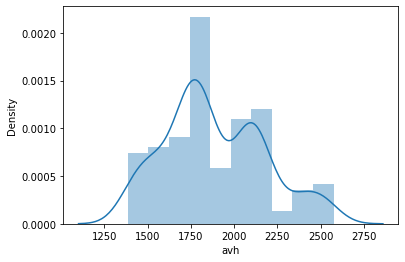

In [30]:
import seaborn as sns
# Box plot
#sns.boxplot(df.avh)
#
# Distribution plot
#
sns.distplot(df.avh)

In [21]:
# check to see which one to impute
dfmedian = df.copy()
dfmean = df.copy()
dfmode = df.copy()

In [64]:
df['avh'] = df['avh'].fillna(df['avh'].mode()[0])

TypeError: 'float' object is not subscriptable

In [24]:
#dfmedian['avh'] = dfmedian['avh'].fillna(dfmedian['avh'].median()[0])
#dfmean['avh'] = dfmean['avh'].fillna(dfmean['avh'].mean()[0])
#dfmode['avh'] = dfmode['avh'].fillna(dfmode['avh'].mode()[0])

dfmedian = dfmedian.fillna(dfmedian.avh.median())
dfmean = dfmean.fillna(dfmean.avh.mean())

In [24]:
dfmedian = df.copy()
dfmean = df.copy()
dfmode = df.copy()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avh', ylabel='Density'>

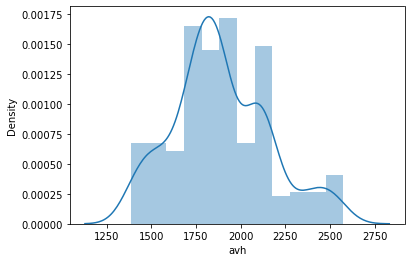

In [26]:
#sns.distplot(dfmedian.avh)
sns.distplot(dfmean.avh)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avh', ylabel='Density'>

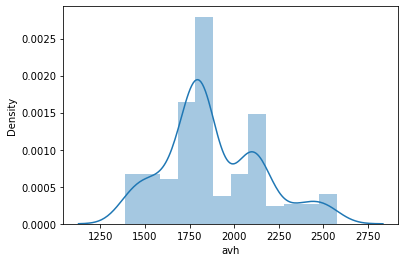

In [27]:
sns.distplot(dfmedian.avh)

In [28]:
dfmode['avh'] = dfmode['avh'].fillna(df['avh'].mode()[0])

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avh', ylabel='Density'>

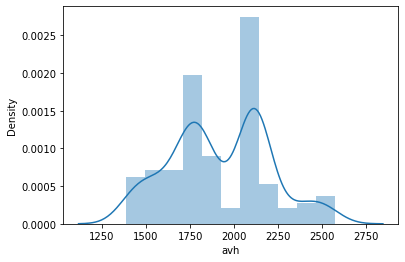

In [29]:
sns.distplot(dfmode.avh)

In [35]:
# The mean has the closest alignment with the presumed reality in Ukraine and Kazakhstan, as well as the shape and distribution before imputation
# I will continue with it. 
df['avh'] = df.avh.fillna(df.avh.mean())

In [50]:
#df

In [49]:
#tatl.describe_data(df)

In [51]:
#tatl.nulls(df)

In [52]:
# wrap it all up into a prepare function and then split it. 
#df.dtypes

To calculate each Misery Index score, a simple formula is used: GDP per capita growth is subtracted from the sum of unemployment, inflation, and bank lending rates.
## For example
#### ([Unemployment (17.4%) + Inflation (359.1%) + Bank‐Lending Rate (21.6%)] − Real GDP Growth (0.9%) = 397.2.)

In [78]:
#df['year']= pd.to_datetime(df['year'])

In [79]:
#df.dtypes

In [80]:
# add hours to the year to avoid duplicate values
#df['year'] = df['year'] + pd.to_timedelta(df.groupby('year').cumcount(), unit='h')

In [81]:
#df

In [82]:
def prepare_data(df):
    # Still considering playing with this as date-time.
    df['year'] = df['year'].fillna(0).astype('int')
    df = df.rename(columns={'Both sexes': 'both_sexes', 'Female': 'female', 'Male': 'male'})
    df['both_sexes'] = pd.DataFrame(df.both_sexes.str[0:4])
    df['female'] = pd.DataFrame(df.female.str[0:4])
    df['male'] = pd.DataFrame(df.male.str[0:4])
    # These two are unsalvageable 
    df = df.drop(['cor_exp', 'statcap'], axis=1)
    # Many columns that are of interest to be are nulls for these three countries
    # There's no way to properly infer the values 
    df = df[df['country'].apply(lambda val: all(val != s for s in ['Belarus', 'Bhutan', 'Guyana']))]
    # The mean has the closest alignment with the presumed reality in Ukraine and Kazakhstan
    # as well as the shape and distribution before imputation
    df = df.reset_index(drop=True)    
    df['avh'] = df.avh.fillna(df.avh.mean())
    # these columns offer no value to this study; will be kept in data dictionary
    # notes.md will explain why.
    df = df.drop(['i_cig', 'i_xm','i_xr', 'i_outlier', 'i_irr'], axis=1)
    df = df.astype({'both_sexes': 'float64', 'female': 'float64', 'male': 'float64'})
    return df


In [83]:
#df = prepare_data(df)

In [84]:
#tatl.describe_data(df)

In [ ]:
# Changed both_sexes from object to float
df['both_sexes'] = df['both_sexes'].astype(float)

# Changed female from object to float
df['female'] = df['female'].astype(float)

# Changed male from object to float
df['male'] = df['male'].astype(float)

In [85]:
#df2 = df.astype({'both_sexes': 'float64', 'female': 'float64', 'male': 'float64'})

In [86]:
#df2.dtypes

In [74]:
def prepare_data(df):
    # Still considering playing with this as date-time.
    df['year'] = df['year'].fillna(0).astype('int')
    df = df.rename(columns={'Both sexes': 'both_sexes', 'Female': 'female', 'Male': 'male'})
    df['both_sexes'] = pd.DataFrame(df.both_sexes.str[0:4])
    df['female'] = pd.DataFrame(df.female.str[0:4])
    df['male'] = pd.DataFrame(df.male.str[0:4])
    # These two are unsalvageable 
    df = df.drop(['cor_exp', 'statcap'], axis=1)
    # Many columns that are of interest to be are nulls for these three countries
    # There's no way to properly infer the values 
    df = df[df['country'].apply(lambda val: all(val != s for s in ['Belarus', 'Bhutan', 'Guyana']))]
    # The mean has the closest alignment with the presumed reality in Ukraine and Kazakhstan
    # as well as the shape and distribution before imputation
    df = df.reset_index(drop=True)    
    df['avh'] = df.avh.fillna(df.avh.mean())
    # these columns offer no value to this study; will be kept in data dictionary
    # notes.md will explain why.
    df = df.drop(['i_cig', 'i_xm','i_xr', 'i_outlier', 'i_irr'], axis=1)
    df = df.astype({'both_sexes': 'float64', 'female': 'float64', 'male': 'float64'})
    return df

In [110]:
df = get.acquire_data()

In [111]:
df = prepare_data(df)

In [112]:
df.dtypes

countrycode       object
country           object
currency_unit     object
year               int64
rgdpe            float64
rgdpo            float64
pop              float64
emp              float64
avh              float64
hc               float64
ccon             float64
cda              float64
cgdpe            float64
cgdpo            float64
cn               float64
ck               float64
ctfp             float64
cwtfp            float64
rgdpna           float64
rconna           float64
rdana            float64
rnna             float64
rkna             float64
rtfpna           float64
rwtfpna          float64
labsh            float64
irr              float64
delta            float64
xr               float64
pl_con           float64
pl_da            float64
pl_gdpo          float64
csh_c            float64
csh_i            float64
csh_g            float64
csh_x            float64
csh_m            float64
csh_r            float64
pl_c             float64
pl_i             float64


In [99]:
df.year = pd.to_datetime(df.year, infer_datetime_format = True)

In [113]:
df2 = df.copy()

In [115]:
df['year'] = pd.to_datetime(df['year'], format = "%Y").dt.strftime('%Y')

In [119]:
df2.year = pd.to_datetime(df2.year, infer_datetime_format = True)

In [121]:
df2['year'] = df2['year'] + pd.to_timedelta(df2.groupby('year').cumcount(), unit='h')

In [124]:
# Sort index by order date
df3 = df2.set_index('year').sort_index()

In [127]:
df3.index.is_unique

True

In [128]:
df3

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,both_sexes,female,male
year,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,CAN,Canada,Canadian Dollar,1.276876e+06,1.284667e+06,30.588383,14.952766,1786.186367,3.504107,8.876788e+05,...,0.581162,0.505927,0.753662,0.513459,0.514761,0.463148,0.808440,10.7,5.0,16.6
2000-01-01 01:00:00,CHN,China,Yuan Renminbi,5.514430e+06,5.420106e+06,1290.550765,735.723144,2090.475311,2.313537,3.939191e+06,...,0.220126,0.280168,0.148072,0.447197,0.482951,0.197761,0.560159,14.9,14.5,15.5
2000-01-01 02:00:00,CZE,Czech Republic,Czech Koruna,2.288185e+05,2.315232e+05,10.289373,4.886872,1895.562155,3.573689,1.670260e+05,...,0.278533,0.341834,0.218788,0.469314,0.457078,0.271949,0.357402,13.4,5.1,22.6
2000-01-01 03:00:00,DEU,Germany,Euro,3.030253e+06,3.035472e+06,81.400882,39.603115,1465.937805,3.566319,2.240533e+06,...,0.606525,0.648399,0.847104,0.515353,0.536459,0.646678,0.854531,11.2,5.3,17.6
2000-01-01 04:00:00,FIN,Finland,Euro,1.860555e+05,1.865058e+05,5.187954,2.305018,1704.713453,3.131667,1.161209e+05,...,0.694162,0.593000,0.839391,0.504715,0.486676,0.561708,1.085940,21.7,10.4,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 10:00:00,LTU,Lithuania,Euro,1.034802e+05,8.964218e+04,2.759627,1.379529,1886.084474,3.296741,8.059303e+04,...,0.556210,0.549069,0.433854,0.657423,0.548743,0.460375,0.696666,20.2,6.2,36.1
2019-01-01 11:00:00,POL,Poland,Zloty,1.259694e+06,1.211846e+06,37.887768,16.159107,2022.632232,3.457758,9.740322e+05,...,0.489376,0.523544,0.392328,0.683009,0.617757,0.420247,0.786552,9.3,2.4,16.5
2019-01-01 12:00:00,SGP,Singapore,Singapore Dollar,5.143763e+05,4.779079e+05,5.804337,3.759604,2330.165875,4.351568,2.296615e+05,...,0.761578,0.687142,0.709089,0.711649,0.673213,0.469200,0.894616,9.7,6.4,12.7


In [129]:
def create_time_df(df):
    '''
    Takes in the suicide dataframe from prepare, creates a copy
    and then converts the year column from int to date-time format,
    with the unique year with hours timestamp set as the index.
    '''
    df2 = df.copy()
    
    # A particular approach to creating date time while avoiding pandas default to 1970
    df2['year'] = pd.to_datetime(df2['year'], format = "%Y").dt.strftime('%Y')
    df2.year = pd.to_datetime(df2.year, infer_datetime_format = True)
    # add an hour to each recurrent year. 
    df2['year'] = df2['year'] + pd.to_timedelta(df2.groupby('year').cumcount(), unit='h')
    # set the index and sort it by date
    df2 = df2.set_index('year').sort_index()
    
    return df2

In [130]:
time_df = create_time_df(df)

In [131]:
time_df

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,both_sexes,female,male
year,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,CAN,Canada,Canadian Dollar,1.276876e+06,1.284667e+06,30.588383,14.952766,1786.186367,3.504107,8.876788e+05,...,0.581162,0.505927,0.753662,0.513459,0.514761,0.463148,0.808440,10.7,5.0,16.6
2000-01-01 01:00:00,CHN,China,Yuan Renminbi,5.514430e+06,5.420106e+06,1290.550765,735.723144,2090.475311,2.313537,3.939191e+06,...,0.220126,0.280168,0.148072,0.447197,0.482951,0.197761,0.560159,14.9,14.5,15.5
2000-01-01 02:00:00,CZE,Czech Republic,Czech Koruna,2.288185e+05,2.315232e+05,10.289373,4.886872,1895.562155,3.573689,1.670260e+05,...,0.278533,0.341834,0.218788,0.469314,0.457078,0.271949,0.357402,13.4,5.1,22.6
2000-01-01 03:00:00,DEU,Germany,Euro,3.030253e+06,3.035472e+06,81.400882,39.603115,1465.937805,3.566319,2.240533e+06,...,0.606525,0.648399,0.847104,0.515353,0.536459,0.646678,0.854531,11.2,5.3,17.6
2000-01-01 04:00:00,FIN,Finland,Euro,1.860555e+05,1.865058e+05,5.187954,2.305018,1704.713453,3.131667,1.161209e+05,...,0.694162,0.593000,0.839391,0.504715,0.486676,0.561708,1.085940,21.7,10.4,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 10:00:00,LTU,Lithuania,Euro,1.034802e+05,8.964218e+04,2.759627,1.379529,1886.084474,3.296741,8.059303e+04,...,0.556210,0.549069,0.433854,0.657423,0.548743,0.460375,0.696666,20.2,6.2,36.1
2019-01-01 11:00:00,POL,Poland,Zloty,1.259694e+06,1.211846e+06,37.887768,16.159107,2022.632232,3.457758,9.740322e+05,...,0.489376,0.523544,0.392328,0.683009,0.617757,0.420247,0.786552,9.3,2.4,16.5
2019-01-01 12:00:00,SGP,Singapore,Singapore Dollar,5.143763e+05,4.779079e+05,5.804337,3.759604,2330.165875,4.351568,2.296615e+05,...,0.761578,0.687142,0.709089,0.711649,0.673213,0.469200,0.894616,9.7,6.4,12.7


In [132]:
# DF is uneffected. Excellent. Proceed to exploration. 
# Create a wrangle file. 
df

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,both_sexes,female,male
0,CAN,Canada,Canadian Dollar,2000,1276875.50,1.284667e+06,30.588383,14.952766,1786.186367,3.504107,...,0.581162,0.505927,0.753662,0.513459,0.514761,0.463148,0.808440,10.7,5.0,16.6
1,CAN,Canada,Canadian Dollar,2001,1272416.75,1.273725e+06,30.880073,15.074832,1773.040815,3.518916,...,0.573427,0.504303,0.741430,0.505602,0.494469,0.481656,0.816376,10.9,5.0,16.8
2,CAN,Canada,Canadian Dollar,2002,1278943.00,1.282036e+06,31.178263,15.427291,1754.363462,3.533788,...,0.581788,0.515401,0.765516,0.492282,0.483348,0.518711,0.814302,10.5,4.9,16.3
3,CAN,Canada,Canadian Dollar,2003,1320633.50,1.346111e+06,31.488048,15.770746,1743.803145,3.548723,...,0.667971,0.580319,0.863409,0.530408,0.524570,0.595386,0.922966,10.9,5.2,16.7
4,CAN,Canada,Canadian Dollar,2004,1377227.50,1.406271e+06,31.815494,16.046000,1753.799959,3.563720,...,0.735556,0.644572,0.938958,0.567856,0.559545,0.669490,0.993898,10.3,5.2,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,USA,United States,US Dollar,2015,18905122.00,1.878536e+07,320.878310,150.248474,1770.023174,3.728116,...,0.939043,0.901439,1.243926,0.671554,0.716726,0.949906,1.000000,12.9,6.1,19.9
296,USA,United States,US Dollar,2016,19285252.00,1.909520e+07,323.015995,152.396957,1766.744125,3.733411,...,0.950885,0.918794,1.224623,0.667374,0.717047,0.968222,1.000000,13.7,6.3,21.2
297,USA,United States,US Dollar,2017,19754754.00,1.954298e+07,325.084756,154.672317,1763.726676,3.738714,...,0.969497,0.934584,1.213737,0.684219,0.720900,1.000000,1.000000,14.4,6.5,22.5
298,USA,United States,US Dollar,2018,20369440.00,2.015526e+07,327.096265,156.675903,1774.703811,3.744024,...,0.990763,0.963756,1.251203,0.706347,0.747758,1.038351,1.000000,14.1,6.6,21.8
